# Dimensionality Reduction! - SVD

**References:**

https://machinelearningmastery.com/singular-value-decomposition-for-dimensionality-reduction-in-python/#:~:text=SVD%20for%20Dimensionality-,Dimensionality%20Reduction%20and%20SVD,to%20predict%20the%20target%20variable.

https://analyticsindiamag.com/beginners-guide-to-truncated-svd-for-dimensionality-reduction/

**Note:** The Concept of Dimentionality reduction is explained in " Dimentionality reduction - LSA" Notebook.

### Contents:

1. <a href="#Introduction:">Introduction</a>
2. <a href="#Code-for-the-SVD-Algorithm">Code for the SVD Algorithm</a>

### Introduction:

The singular-value decomposition/ SVD is a dimension reduction technique for matrices that reduces the matrix into its component to simplify the calculation.

Mathematically we can say that factorization of any matrix(m×n) into its eigendecomposition or unitary matrix U(m×m), rectangular diagonal matrix (m×n) and V*(n×n) complex unitary matrix is called singular-value decomposition.

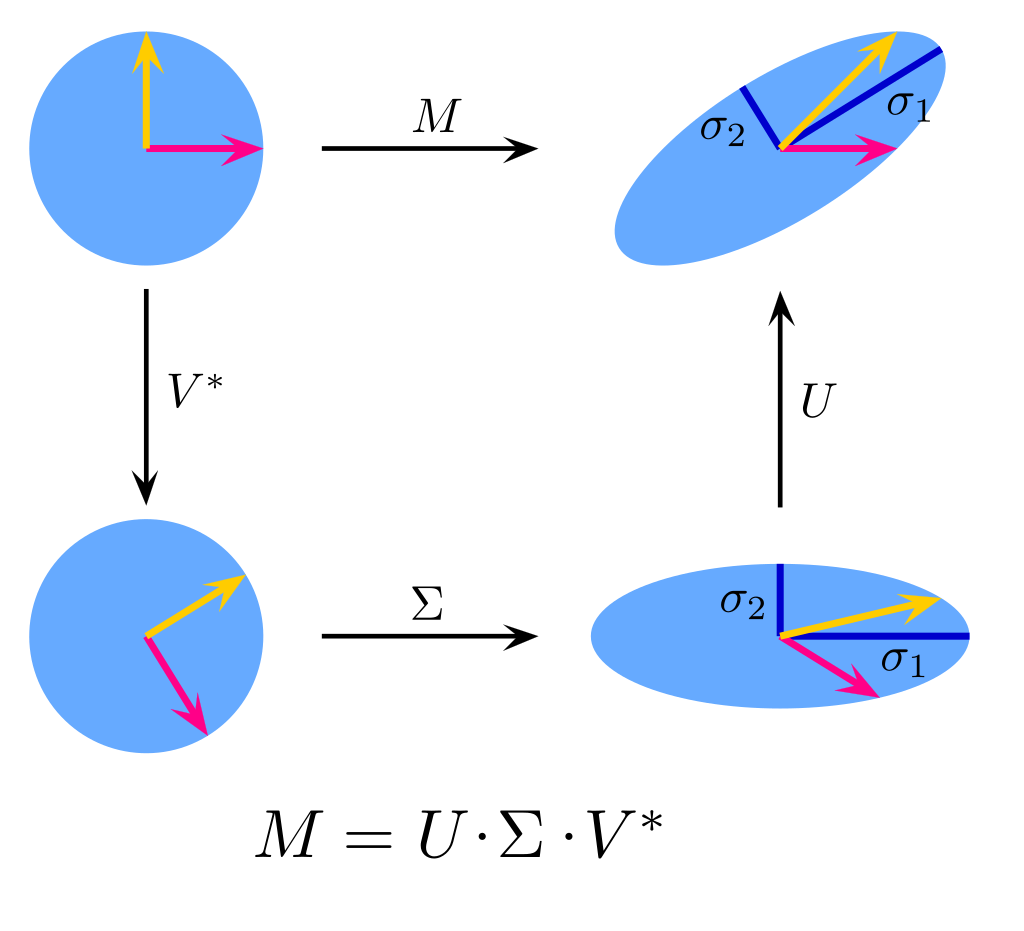

Singular Value Decomposition, or SVD, might be the most popular technique for dimensionality reduction when data is sparse.

Sparse data refers to rows of data where many of the values are zero. This is often the case in some problem domains like recommender systems where a user has a rating for very few movies or songs in the database and zero ratings for all other cases. Another common example is a bag of words model of a text document, where the document has a count or frequency for some words and most words have a 0 value.

Examples of sparse data appropriate for applying SVD for dimensionality reduction:

- Recommender Systems
- Customer-Product purchases
- User-Song Listen Counts
- User-Movie Ratings
- Text Classification
- One Hot Encoding
- Bag of Words Counts
- TF/IDF

We can further explain SVD in the projection method, where a matrix of m-columns gets separated into m matrices. There are many kinds of SVD methods-

- Truncated SVD
- Partial least square SVD
- Randomized SVD

### Code for the SVD Algorithm

First, we can use the make_classification() function to create a synthetic binary classification problem with 1,000 examples and 20 input features, 15 inputs of which are meaningful.

In [1]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


Next, we can use dimensionality reduction on this dataset while fitting a logistic regression model.

We will use a Pipeline where the first step performs the SVD transform and selects the 10 most important dimensions or components, then fits a logistic regression model on these features. We don’t need to normalize the variables on this dataset, as all variables have the same scale by design.

The pipeline will be evaluated using repeated stratified cross-validation with three repeats and 10 folds per repeat. Performance is presented as the mean classification accuracy.

The complete example is listed below.

In [2]:
# evaluate svd with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the pipeline
steps = [('svd', TruncatedSVD(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.814 (0.034)


Running the example evaluates the model and reports the classification accuracy.

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

In this case, we can see that the SVD transform with logistic regression achieved a performance of about 81.4 percent.

How do we know that reducing 20 dimensions of input down to 10 is good or the best we can do?

We don’t; 10 was an arbitrary choice.

A better approach is to evaluate the same transform and model with different numbers of input features and choose the number of features (amount of dimensionality reduction) that results in the best average performance.

The example below performs this experiment and summarizes the mean classification accuracy for each configuration.

>1 0.542 (0.046)
>2 0.626 (0.050)
>3 0.719 (0.053)
>4 0.722 (0.052)
>5 0.721 (0.054)
>6 0.729 (0.045)
>7 0.802 (0.034)
>8 0.800 (0.040)
>9 0.814 (0.037)
>10 0.814 (0.034)
>11 0.817 (0.037)
>12 0.820 (0.038)
>13 0.820 (0.036)
>14 0.825 (0.036)
>15 0.865 (0.027)
>16 0.865 (0.027)
>17 0.865 (0.027)
>18 0.865 (0.027)
>19 0.865 (0.027)


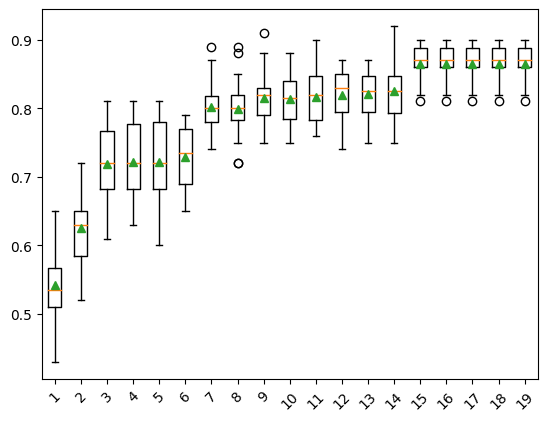

In [3]:
# compare svd number of components with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1,20):
		steps = [('svd', TruncatedSVD(n_components=i)), ('m', LogisticRegression())]
		models[str(i)] = Pipeline(steps=steps)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

Running the example first reports the classification accuracy for each number of components or features selected.

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

We can see a general trend of increased performance as the number of dimensions is increased. On this dataset, the results suggest a trade-off in the number of dimensions vs. the classification accuracy of the model.

Interestingly, we don’t see any improvement beyond 15 components. This matches our definition of the problem where only the first 15 components contain information about the class and the remaining five are redundant.

A box and whisker plot is created for the distribution of accuracy scores for each configured number of dimensions.

We can see the trend of increasing classification accuracy with the number of components, with a limit at 15.

We may choose to use an SVD transform and logistic regression model combination as our final model.

This involves fitting the Pipeline on all available data and using the pipeline to make predictions on new data. Importantly, the same transform must be performed on this new data, which is handled automatically via the Pipeline.

The code below provides an example of fitting and using a final model with SVD transforms on new data.

In [4]:
# make predictions using svd with logistic regression
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the model
steps = [('svd', TruncatedSVD(n_components=15)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[0.2929949,-4.21223056,-1.288332,-2.17849815,-0.64527665,2.58097719,0.28422388,-7.1827928,-1.91211104,2.73729512,0.81395695,3.96973717,-2.66939799,3.34692332,4.19791821,0.99990998,-0.30201875,-4.43170633,-2.82646737,0.44916808]]
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


Running the example fits the Pipeline on all available data and makes a prediction on new data.

Here, the transform uses the 15 most important components from the SVD transform, as we found from testing above.

A new row of data with 20 columns is provided and is automatically transformed to 15 components and fed to the logistic regression model in order to predict the class label.

In [5]:
#End

[<a href="#Content:">Back to Content</a>]

**THE END**

In [ ]:
#tested:no errors